# **PROBLEM STATEMENT**

    Banks play a crucial role in market economies, They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit.

    Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This assessment requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

    The goal  is to build a model that borrowers can use to help make the best financial decisions.

In [0]:
import pandas as pd    
import numpy as np     # Multi-dimensional array
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns
%matplotlib inline

# from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import roc_auc_score

# **DATA COLLECTION AND PREPROCESSING**

Historical data are provided on over 250,000 borrowers. About the files:

    cs-test.csv – this is the test set you must use to generate the final results for your model
    • cs-training.csv – this is the training set you are to use to build your model
    • sampleEntry.csv – when you build your model and test it on cs-test.csv data, you’ll need to generate results in this exact format which we will use to determine your model’s predictive accuracy. This is just an example file for your model output. To be precise, your final results should reside on the first 2 columns , with column 1 (titled Id), containing the number of rows in ascending order (will follow the exact same order as in the cs-test.csv), and column 2 (titled Probability) being your probability of default for the customer on that respective row.
    • Data Dictionary.xls – data dictionary for all fields in the training and test data set

In [0]:
# load training dataset
db_training = pd.read_csv('cs-training.csv')

In [22]:
# Lets preview our 5 Samples of our training data
db_training.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [23]:
db_training.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [24]:
# This gives us some statistical details of our training data
db_training.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [25]:
# Know the Sample size and basically our number of Features 
db_training.shape

(150000, 12)

In [26]:
# A more description of our Data types
db_training.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [27]:
# More Infromation about our data
# We discover from here columns and rows with missing values and basically the data types
db_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [153]:
df = db_training[db_training.NumberOfDependents.notnull()]
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CombinedLoan,MonthlyDebtPayments,is_Retired,is_Senior,is_Working,is_HighY,is_LowY,is_MidY
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000
mean,75000.500000,0.066840,6.048438,52.295553,0.421033,353.005076,2.516861e+04,8.452760,0.265973,1.018240,0.240387,0.737413,0.202420,1.397711e+05,0.811607,3.316920e+07,0.253133,0.512893,0.233973,0.399673,0.201927,0.39840
std,43301.414527,0.249746,249.755371,14.771249,4.192781,2037.818523,3.937203e+04,5.145951,4.169304,1.129771,4.155179,1.107021,0.401805,2.328540e+05,0.391027,2.005543e+08,0.434808,0.499835,0.423357,0.489833,0.401439,0.48957
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.849000e+04,1.000000,7.760000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.412690e+04,1.000000,2.107000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,1.333300e+04,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,7.576780e+04,1.000000,4.803000e+03,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000,1.564550e+07,1.000000,3.296607e+10,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [32]:
# We determine the sum of missing values 
# The MonthlyIncome and the NumberofDependents have a large number of missing values
db_training.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [43]:
db_test = pd.read_csv('cs-test.csv')
db_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [44]:
db_test.shape

(101503, 12)

In [45]:
SampleN = 10
display(db_test.sample(SampleN))

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
28774,28775,NaN,0.356782,31,0,0.349286,10300.0,9,0,1,0,0.0
70019,70020,NaN,0.278648,41,0,0.492024,4450.0,11,0,1,0,1.0
62310,62311,NaN,0.000000,81,0,1.014441,4500.0,6,0,1,0,0.0
88374,88375,NaN,0.146040,52,0,0.117980,6000.0,6,0,0,0,0.0
91919,91920,NaN,0.993007,55,2,0.874481,4333.0,8,0,2,0,3.0
57127,57128,NaN,0.111911,47,0,0.181364,5000.0,3,0,1,0,0.0
48678,48679,NaN,0.391266,53,0,0.879147,8108.0,10,0,3,0,2.0
54109,54110,NaN,0.751979,55,0,1937.000000,NaN,6,0,2,0,0.0
59778,59779,NaN,0.291521,43,1,0.470452,3874.0,7,0,2,0,1.0
9931,9932,NaN,0.986075,59,0,0.802240,5000.0,6,0,3,0,0.0


In [47]:
SampleN = 10
display(db_training.sample(SampleN))

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
23364,23365,0,0.118505,62,0,1476.500000,1.0,10,0,1,0,0.0
40304,40305,0,0.417539,59,0,0.372393,3020.0,5,0,1,0,0.0
98241,98242,0,0.429326,32,0,0.286214,8000.0,16,0,1,0,4.0
78587,78588,0,0.055568,53,0,0.419421,7290.0,18,0,4,0,1.0
16200,16201,0,0.092283,37,0,0.096724,9583.0,5,0,2,0,3.0
95103,95104,0,0.034218,56,0,2292.000000,NaN,4,0,2,0,0.0
61978,61979,0,1.024283,27,1,0.184791,2445.0,3,0,0,0,2.0
80642,80643,0,0.001215,63,0,42.000000,NaN,5,0,0,0,NaN
116827,116828,0,0.029026,76,0,0.074173,12416.0,8,0,1,0,0.0
143867,143868,0,0.000000,50,0,0.488837,3000.0,9,0,1,0,0.0


In [0]:
"""Quick Stats: Data Types"""
# Function to output missing values & UniqueCounts & DataTypes
def basic_details(df):
    details = pd.DataFrame()
    details['Missing value'] = df.isnull().sum()
    details['N unique value'] = df.nunique()
    details['dtype'] = df.dtypes
    display(details)

In [49]:
# Train Test
basic_details(db_training)  

# MonthlyIncome has 29731 missing values
# NumberOfDependents have 3924 missing values

,Missing value,N unique value,dtype
Unnamed: 0,0,150000,int64
SeriousDlqin2yrs,0,2,int64
RevolvingUtilizationOfUnsecuredLines,0,125728,float64
age,0,86,int64
NumberOfTime30-59DaysPastDueNotWorse,0,16,int64
DebtRatio,0,114194,float64
MonthlyIncome,29731,13594,float64
NumberOfOpenCreditLinesAndLoans,0,58,int64
NumberOfTimes90DaysLate,0,19,int64
NumberRealEstateLoansOrLines,0,28,int64


In [51]:
# Test test
basic_details(db_test)

,Missing value,N unique value,dtype
Unnamed: 0,0,101503,int64
SeriousDlqin2yrs,101503,0,float64
RevolvingUtilizationOfUnsecuredLines,0,85716,float64
age,0,82,int64
NumberOfTime30-59DaysPastDueNotWorse,0,16,int64
DebtRatio,0,79878,float64
MonthlyIncome,20103,11976,float64
NumberOfOpenCreditLinesAndLoans,0,56,int64
NumberOfTimes90DaysLate,0,18,int64
NumberRealEstateLoansOrLines,0,24,int64


# **DATA PREPARATION**

    Wrangle data and prepare it for training
    
    Clean that which may require it (remove duplicates, correct errors, deal with missing values, normalization, data type conversions, etc.)
    
    Randomize data, which erases the effects of the particular order in which we collected and/or otherwise prepared our data
    
    Visualize data to help detect relevant relationships between variables or class imbalances (bias alert!), or perform other exploratory analysis

In [53]:
LegalAge = 18
LessLegalAgeCount = len(db_training.loc[db_training["age"] < 18, "age"])
print("Total number of less than assumed legal age {} is {}".format(LegalAge, LessLegalAgeCount))

Total number of less than assumed legal age 18 is 1


In [0]:
db_training.loc[db_training["age"] == 0, "age"] = db_training.age.median()

# Convert data-type
db_training["age"] = db_training["age"].astype('int64')

In [55]:
"""Check Again"""
print(db_training["age"].describe())

count    150000.000000
mean         52.295553
std          14.771249
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


In [0]:
# Reason due to Monthly Income having 29731 Missing Values
# Decided to input Median per quartile Age range

# Determine/Set rows that fulfil these quartile range conditions
Age_Range_1 = db_training.loc[(db_training["age"] >= 18) & (db_training["age"] < 41)]
Age_Range_2 = db_training.loc[(db_training["age"] >= 41) & (db_training["age"] < 63)]
Age_Range_3 = db_training.loc[(db_training["age"] >= 63)]

# Per Determine/Set rows, Find that range mean MonthlyIncome
Age_R1_MonthlyIncome_impute = Age_Range_1.MonthlyIncome.mean()
Age_R2_MonthlyIncome_impute = Age_Range_2.MonthlyIncome.mean()
Age_R3_MonthlyIncome_impute = Age_Range_3.MonthlyIncome.mean()

NOW TO FILL THEM

In [0]:
# Fill Missing MonthlyIncome with 99999 for easy reference
db_training["MonthlyIncome"] = db_training["MonthlyIncome"].fillna(99999)

# Convert into integer dtype
db_training["MonthlyIncome"] = db_training["MonthlyIncome"].astype('int64')

# Now to fill them
db_training.loc[(db_training["age"] >= 18) & (db_training["age"] < 41) & (db_training["age"] == 99999)] = Age_R1_MonthlyIncome_impute

db_training.loc[(db_training["age"] >= 41) & (db_training["age"] < 63) & (db_training["age"] == 99999)] = Age_R2_MonthlyIncome_impute

db_training.loc[(db_training["age"] >= 63) & (db_training["age"] == 99999)] = Age_R3_MonthlyIncome_impute

In [60]:
"""Check Again"""
basic_details(db_training)

,Missing value,N unique value,dtype
Unnamed: 0,0,150000,float64
SeriousDlqin2yrs,0,2,float64
RevolvingUtilizationOfUnsecuredLines,0,125728,float64
age,0,85,float64
NumberOfTime30-59DaysPastDueNotWorse,0,16,float64
DebtRatio,0,114194,float64
MonthlyIncome,0,13595,float64
NumberOfOpenCreditLinesAndLoans,0,58,float64
NumberOfTimes90DaysLate,0,19,float64
NumberRealEstateLoansOrLines,0,28,float64


**Number of Dependents**

In [0]:
# Reason due to NumberOfDependents having 3924 Missing Values

# Fill missing with zero's
db_training["NumberOfDependents"] = db_training["NumberOfDependents"].fillna(0)

# Convert into integer dtype
db_training["NumberOfDependents"] = db_training["NumberOfDependents"].astype('int64')

# Check counts per category of 'NumberOfDependents'
# print(train_raw_copy.NumberOfDependents.value_counts())

In [62]:
"""Check Again"""
basic_details(db_training)

,Missing value,N unique value,dtype
Unnamed: 0,0,150000,float64
SeriousDlqin2yrs,0,2,float64
RevolvingUtilizationOfUnsecuredLines,0,125728,float64
age,0,85,float64
NumberOfTime30-59DaysPastDueNotWorse,0,16,float64
DebtRatio,0,114194,float64
MonthlyIncome,0,13595,float64
NumberOfOpenCreditLinesAndLoans,0,58,float64
NumberOfTimes90DaysLate,0,19,float64
NumberRealEstateLoansOrLines,0,28,float64


# **EXPLORATORY DATA ANALYSIS**



Target Variable

In [64]:
# SeriousDlqin2yrs (i.e.Target Variable) Lets first see the balance of the dataset
"""SeriousDlqin2yrs (i.e.Target Variable)"""
print("Exploring SeriousDlqin2yrs (i.e.Target Variable)...")

# List Comprehension
class_0 = [c for c in db_training['SeriousDlqin2yrs'] if c == 0]
class_1 = [c for c in db_training['SeriousDlqin2yrs'] if c == 1]
# # Alternative Mask Method
# class_0 = train_raw_copy.SeriousDlqin2yrs.value_counts()[0]
# class_1 = train_raw_copy.SeriousDlqin2yrs.value_counts()[1]

class_0_count = len(class_0)
class_1_count = len(class_1)

print("Target Variable Balance...")
print("Total number of class_0: {}".format(class_0_count))
print("Total number of class_1: {}".format(class_1_count))
print("Occurance event rate: {} %".format(round(class_1_count/(class_0_count+class_1_count) * 100, 3)))   # round 3.dp

Exploring SeriousDlqin2yrs (i.e.Target Variable)...
Target Variable Balance...
Total number of class_0: 139974
Total number of class_1: 10026
Occurance event rate: 6.684 %


PLOTING

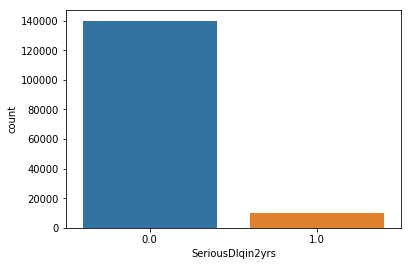

In [65]:
# Plot
sns.countplot("SeriousDlqin2yrs", data=db_training)
plt.show()

Right...we have an unbalanced dataset here. In short, since we have a higher proportion of the dataset not having experienced financial distress (SeriousDlqin2yrs=0) our model may overfit easily to this rather than accurately predicting those having experienced financial distress. Of which is our model objective....Consequently, this would also likely cause an inaccurate portray of the evaluation metrics itself (ROC AUC)...



**Other Features**

    HeatMap
    We will now use the HeatMap to see which features we can discard or merge.

    The Objective here is to remove those features bearing high correlations (Remove Multi-Colinearity which causes over-fitting) & engineer more features to optimize the predictive model

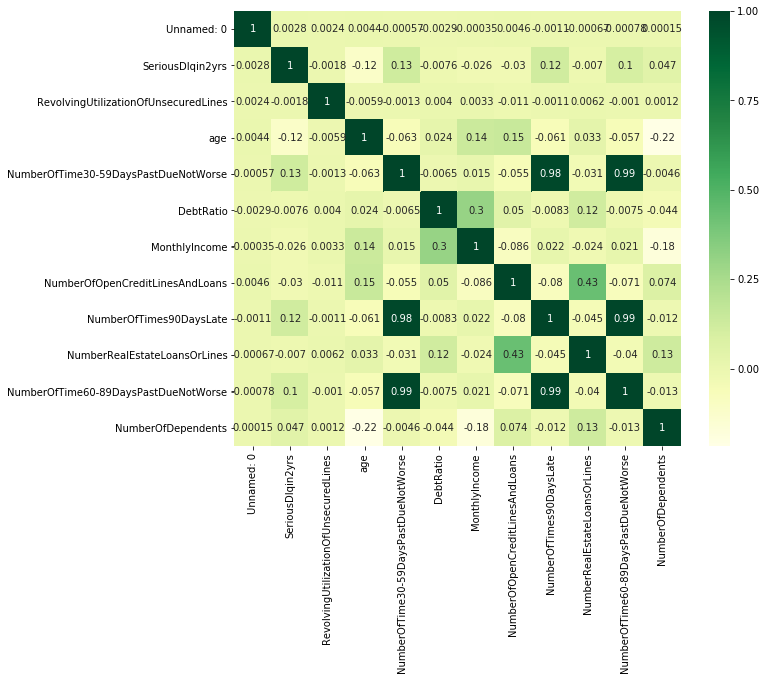

In [67]:
"""Correlation Heat-Map"""
cor = db_training.corr()
plt.figure(figsize=(10, 8))
# sns.set(font_scale=0.7)
sns.heatmap(cor, annot=True, cmap='YlGn')
plt.show()

# **Notes for Feature Engineering**

    **Group_A:** Bears high inter-correlations (0.98)
    NumberOfTime30-59DaysPastDueNotWorse,

    NumberOfTimes90DaysLate,

    NumberOfTime60-89DaysPastDueNotWorse

    **Group_B:** Suprisingly low correaltion to Target Variable (-0.026)
    MonthlyIncome

   ** Group_C:** Bears high inter-correlations (0.43)
    NumberOfOpenCreditLinesAndLoans,
    NumberRealEstateLoansOrLines

# **Deeper Data Cleaning/Feature Engineering [C3-Create, C4-Convert]**
    Now with a good reference point we can further execute feature engineering

**Group_A**
    Quantity of Defaults
    NumberOfTime30-59DaysPastDueNotWorse,

    NumberOfTimes90DaysLate,

    NumberOfTime60-89DaysPastDueNotWorse

    Evidently, we can see they all bear high correlations 0.98. We will try to merge them to avoid collinearity which may overfit the model by distorting or giving higher and incorrect feature weightings.

**General Idea**

    Create a new dataframe column of a Binary statistical datatype indicating if a default was made before or not. (1/0) (Yes/No)

In [0]:
"""
Clean Data - 3 - Creating
"""

"""Joining No# Times past due: CombinedDefault"""
# Reason huge strong correlations i.e.0.98 & 0.99
# Decided to Sum all & Change into Binary Feature (1/0) (Y/0)
# Create Dummy Reference df
db_training['CD'] = (db_training['NumberOfTime30-59DaysPastDueNotWorse']
                                     + db_training['NumberOfTimes90DaysLate']
                                     + db_training['NumberOfTime60-89DaysPastDueNotWorse'])

# Set '1' for those more than zero indicating Yes there was a default before
db_training['CombinedDefault'] = 1
db_training.loc[(db_training['CD'] == 0), 'CombinedDefault'] = 0
# Remove Dummy Reference df
del db_training['CD']

**Group_B (New Feature Net Worth)**
**NEW FEATURE: Net Worth** 

        Monthly Income seems to have little correlation (-0.026). However, intutively speaking this should have a strong correlation to financial distress.

**General Idea**

    We will now use a very generic networth formula. In short, incorporate Age & Monthly Income to derive Net Worth

In [0]:
"""New Feature: Net Worth"""
# Decided on general formula NetWorth = (MonthlyIncome x Age) / 10
# https://www.bogleheads.org/forum/viewtopic.php?t=195357
NetWorthDivisor = 10
db_training['NetWorth'] = db_training['MonthlyIncome'] * db_training['age'] / NetWorthDivisor

**Group_C**

    Quantity of Loans made
    NumberOfOpenCreditLinesAndLoans,

**NumberRealEstateLoansOrLines**

    Similar to quantity of defaults, we can see they too high correlations 0.43. We will try to merge them now.
    
  **General Idea**
  
            Same as Quantity of Defaults we will do a Binary Yes or No.

In [0]:
"""Join No# Loans: CombinedLoan"""
# Reason huge strong correlations i.e.0.43
# Decided to Sum all & WITH BUFFER of 5times
LoanLinesBuffer = 5
# Create Dummy Reference df
db_training['CL'] = db_training['NumberOfOpenCreditLinesAndLoans'] + db_training['NumberRealEstateLoansOrLines']

db_training['CombinedLoan'] = 1
db_training.loc[db_training['CL'] >= LoanLinesBuffer, 'CombinedLoan'] = 1
db_training.loc[db_training['CL'] < LoanLinesBuffer, 'CombinedLoan'] = 0
# Remove Dummy Reference df
del db_training['CL']

**New Feature (Debt Payments)**

**NEW FEATURE: Debt Payments**

    Since we are given components of the ratio, why not? It's always better to do extra.

In [0]:
"""New Feature: Monthly debt payments"""

# Derivative formula MonthlyDebtPayments = (DebtRatio) x (MonthlyIncome)
db_training['MonthlyDebtPayments'] = db_training['DebtRatio'] * db_training['MonthlyIncome']
db_training['MonthlyDebtPayments'] = db_training['MonthlyDebtPayments'].astype('int64')

**New Feature (Age Category)**

**NEW FEATURE: Age Category**



In [0]:
"""New Feature: Age Category"""
db_training["Age_Map"] = db_training["age"]
db_training.loc[(db_training["age"] >= 18) & (db_training["age"] < 41), "Age_Map"] = 1
db_training.loc[(db_training["age"] >= 41) & (db_training["age"] < 63), "Age_Map"] = 2
db_training.loc[(db_training["age"] >= 63), "Age_Map"] = 3

# replacing those numbers to categorical features then get the dummy variables

db_training["Age_Map"] = db_training["Age_Map"].replace(1, "Working")
db_training["Age_Map"] = db_training["Age_Map"].replace(2, "Senior")
db_training["Age_Map"] = db_training["Age_Map"].replace(3, "Retired")

db_training = pd.concat([db_training, pd.get_dummies(db_training.Age_Map, prefix='is')], axis=1)

**New Feature (SES Category)**

**NEW FEATURE: Age Category**

    Reason being we will use this to gain a deeper insight during EDA.

    Rather than just knowing the general trend of age, we also want to know which category of age bears 

In [0]:
"""New Feature: Income Category"""
db_training["Income_Map"] = db_training["MonthlyIncome"]
db_training.loc[(db_training["MonthlyIncome"] <= 3400), "Income_Map"] = 1
db_training.loc[(db_training["MonthlyIncome"] > 3400) & (db_training["MonthlyIncome"] <= 8200), "Income_Map"] = 2
db_training.loc[(db_training["MonthlyIncome"] > 8200), "Income_Map"] = 3


# replacing those numbers to categorical features then get the dummy variables\

db_training["Income_Map"] = db_training["Income_Map"].replace(1, "LowY")
db_training["Income_Map"] = db_training["Income_Map"].replace(2, "MidY")
db_training["Income_Map"] = db_training["Income_Map"].replace(3, "HighY")

db_training = pd.concat([db_training, pd.get_dummies(db_training.Income_Map, prefix='is')], axis=1)

 **MORE EDA**

In [75]:
"""Check Again"""
basic_details(db_training)

,Missing value,N unique value,dtype
Unnamed: 0,0,150000,float64
SeriousDlqin2yrs,0,2,float64
RevolvingUtilizationOfUnsecuredLines,0,125728,float64
age,0,85,float64
NumberOfTime30-59DaysPastDueNotWorse,0,16,float64
DebtRatio,0,114194,float64
MonthlyIncome,0,13595,float64
NumberOfOpenCreditLinesAndLoans,0,58,float64
NumberOfTimes90DaysLate,0,19,float64
NumberRealEstateLoansOrLines,0,28,float64


Just a raw truncated peek into what we have engineered thus far

In [76]:
SampleN = 15
display(db_training.sample(SampleN))

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CombinedLoan,MonthlyDebtPayments,Age_Map,is_Retired,is_Senior,is_Working,Income_Map,is_HighY,is_LowY,is_MidY
6170,6171.0,0.0,0.000821,76.0,0.0,2.488604,1403.0,10.0,0.0,1.0,0.0,0,0,10662.8,1,3491,Retired,1,0,0,LowY,0,1,0
46089,46090.0,0.0,0.090504,33.0,0.0,0.629658,3917.0,11.0,0.0,1.0,0.0,2,0,12926.1,1,2466,Working,0,0,1,MidY,0,0,1
33769,33770.0,0.0,1.812968,23.0,0.0,41.000000,99999.0,0.0,2.0,0.0,0.0,0,1,229997.7,0,4099959,Working,0,0,1,HighY,1,0,0
37805,37806.0,0.0,0.176891,52.0,1.0,0.338401,6905.0,9.0,0.0,2.0,0.0,0,1,35906.0,1,2336,Senior,0,1,0,MidY,0,0,1
39742,39743.0,0.0,0.666633,31.0,0.0,0.503130,3833.0,5.0,0.0,1.0,0.0,0,0,11882.3,1,1928,Working,0,0,1,MidY,0,0,1
137315,137316.0,0.0,0.035767,66.0,0.0,0.008767,5474.0,7.0,0.0,0.0,0.0,0,0,36128.4,1,47,Retired,1,0,0,MidY,0,0,1
25759,25760.0,0.0,0.740648,41.0,2.0,0.004640,3447.0,1.0,1.0,0.0,0.0,1,1,14132.7,0,15,Senior,0,1,0,MidY,0,0,1
131674,131675.0,0.0,0.000661,56.0,0.0,2000.000000,99999.0,9.0,0.0,2.0,0.0,0,0,559994.4,1,199998000,Senior,0,1,0,HighY,1,0,0
8686,8687.0,0.0,0.500857,53.0,0.0,0.754102,14200.0,9.0,0.0,2.0,0.0,2,0,75260.0,1,10708,Senior,0,1,0,HighY,1,0,0
141298,141299.0,1.0,0.952032,46.0,0.0,989.000000,99999.0,5.0,0.0,0.0,1.0,0,1,459995.4,1,98899011,Senior,0,1,0,HighY,1,0,0


# **Deeper EDA**

Now with a cleaned up dataset we can start doing EDA for gain a deep insight into what data we are modelling.

Specifically, EDA helps us to get a clearer idea of what relationships or abnormal relationships we have from the features. These may include outliers, a skewed data, reasonableness checks, feature selection etc.

**Quick Data Prep**



In [77]:
"""
Prepare Data for Charting
"""
Features_Preselect_All = db_training.columns
Features_Preselect_Original = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
                               'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                               'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                               'NumberOfDependents']
Features_Preselect_Engineered = ['CombinedDefault', 'NetWorth', 'CombinedLoan', 'MonthlyDebtPayments', 'is_Retired',
                                 'is_Senior', 'is_Working', 'is_HighY', 'is_LowY', 'is_MidY']

# Binary_bin

Binary = ['CombinedLoan', 'Age_Map', 'Income_Map']
print("Binary", "\n", Binary)

# Integer_'int'_Ordinal
Integer = ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
           'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
           'CombinedDefault']
print("Integer_Ordinal", "\n", Integer)

# Real_'float'_Interval
Real = ['DebtRatio', 'MonthlyIncome', 'NetWorth', 'MonthlyDebtPayments']
print("Real_float", "\n", Real)

Binary 
 ['CombinedLoan', 'Age_Map', 'Income_Map']
Integer_Ordinal 
 ['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents', 'CombinedDefault']
Real_float 
 ['DebtRatio', 'MonthlyIncome', 'NetWorth', 'MonthlyDebtPayments']


Now for the actual EDA

I will deal in the order of statistical data types by Binary, Integer, Float. 

**UNI-VARITE**
        
        BINARY

Plotting Bar Plot...for Binary


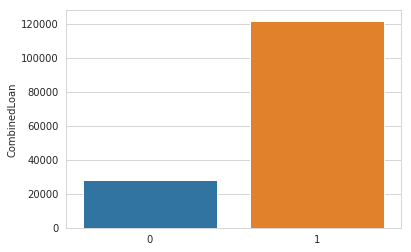

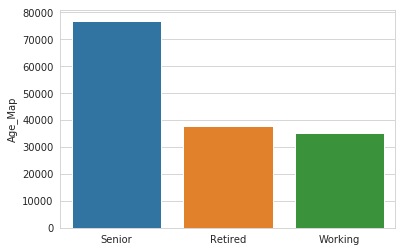

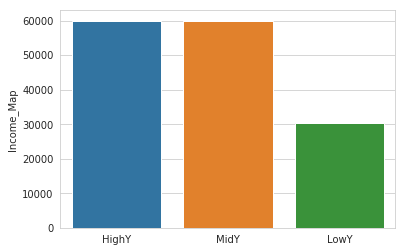

In [79]:
"""Binary"""
print("Plotting Bar Plot...for Binary")
# https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
sns.set_style("whitegrid")  # Chosen
for col in Binary:
    sns.barplot(x=db_training[col].value_counts().index, y=db_training[col].value_counts())
    plt.show()

**Brief Observations**

-'CombinedLoan': Very lob-sided where 3/4 have made loans

-'Age_Map': Data-set contains mostly ages 41 to 63

-'Income_Map': Data-set dominated by High & Mid income earners

**Integer**

Plotting Density Plot...for Integer


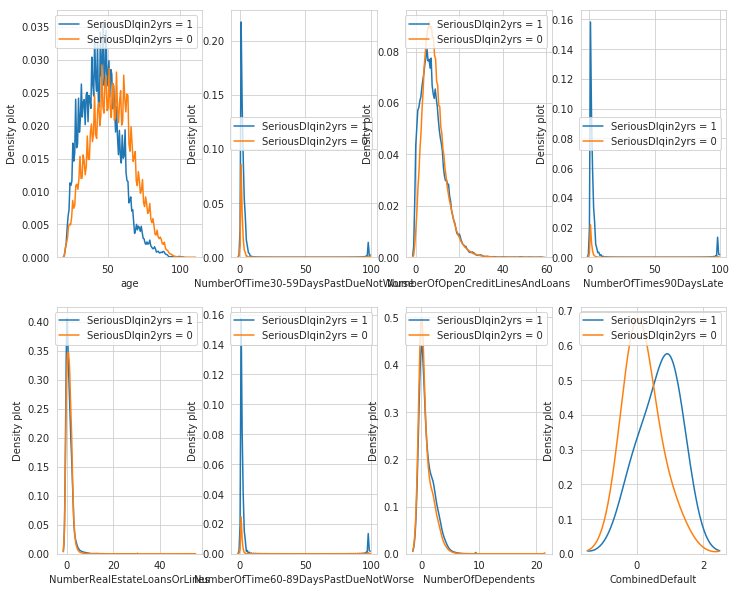

In [84]:
"""Integer"""
print("Plotting Density Plot...for Integer")
# Used as opposed to histogram since this doesnt need bins parameter
i = 0
t1 = db_training.loc[db_training['SeriousDlqin2yrs'] != 0]
t0 = db_training.loc[db_training['SeriousDlqin2yrs'] == 0]

sns.set_style('whitegrid')
# plt.figure()
fig, ax = plt.subplots(2, 4, figsize=(12, 10))

for feature in Integer:
    i += 1
    plt.subplot(2, 4, i)
    sns.kdeplot(t1[feature], bw=0.5, label="SeriousDlqin2yrs = 1")
    sns.kdeplot(t0[feature], bw=0.5, label="SeriousDlqin2yrs = 0")
    plt.ylabel('Density plot', fontsize=10)
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

**Brief Observations**

-'age': Same trend as seen from Age_Map in Binary EDA. Majority of data-set are between ages 41 to 63

-'NumberOfTime30-59DaysPastDueNotWorse': Very High Kurtosis & right-skewed

-'NumberOfOpenCreditLinesAndLoans': High Kurtosis & Right-skewed

-'NumberOfTimes90DaysLate': Very High Kurtosis & Very Right-skewed

-'NumberRealEstateLoansOrLines': High Kurtosis & Right-skewed

-'NumberOfTime60-89DaysPastDueNotWorse': Very High Kurtosis & Very Right-skewed

-'NumberOfDependents': High Kurtosis & Right-skewed

-'CombinedDefault': Gaussian distribution shape

-Reasonable data-set as those who experience financial distress (SeriousDlqin2yrs=1) have left skewed (Median>Mean).

In other words, data population who experience financial distress have a greater proportion of defaults

**switching to a scatter plot for a better visual since, most of the charts have very high kurtosis due to outliers**

Plotting Scatter Plot...for Integer


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


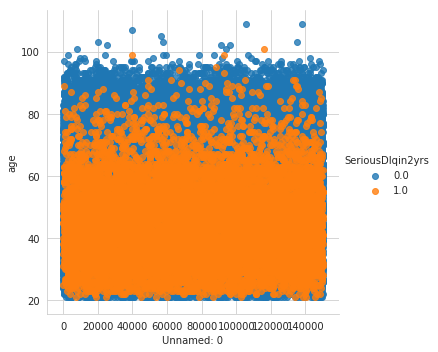

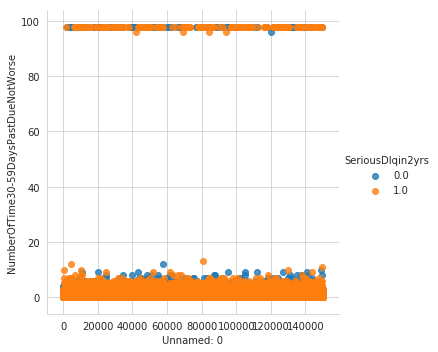

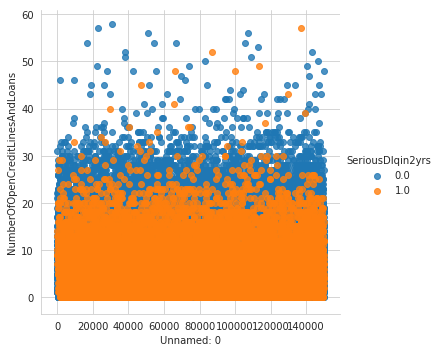

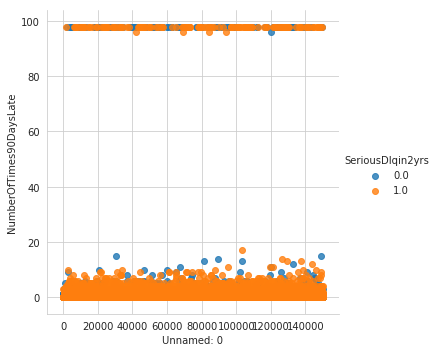

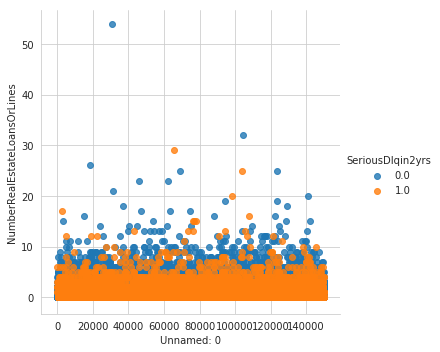

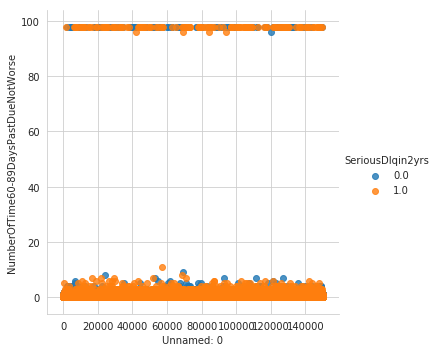

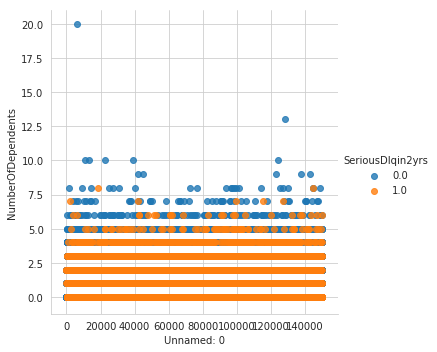

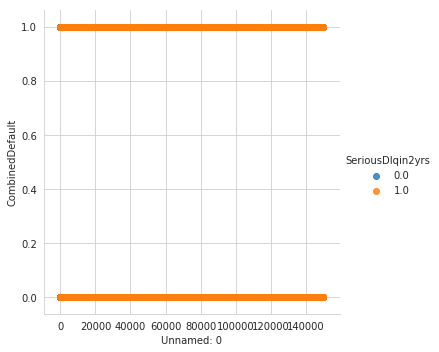

In [85]:
print("Plotting Scatter Plot...for Integer")
sns.set_style("whitegrid")  # Chosen
for col in Integer:
    sns.lmplot(y=col, x="Unnamed: 0", data=db_training, fit_reg=False, hue='SeriousDlqin2yrs', legend=True,
               size=5, aspect=1)
    plt.show()

**Brief Observations (Improved)**

-'age': Same pattern seen. Concentrated on ages 41 to 63

-'NumberOfTime30-59DaysPastDueNotWorse': Interesting disparity! In other words, we have extreme frequency's.

It's a either or case of Borrowers exceeding the 30-59days

very often above 90 times

very few times below 15 times

-'NumberOfOpenCreditLinesAndLoans': Evidently, those who have had financial distress (SeriousDlqin2yrs=1) have lower Loans given their poor credit history

-'NumberOfTimes90DaysLate''NumberRealEstateLoansOrLines': Same pattern as 'NumberOfTime30-59DaysPastDueNotWorse'

-'NumberOfTime60-89DaysPastDueNotWorse': Same pattern as 'NumberOfTime30-59DaysPastDueNotWorse'

-'NumberOfDependents': Interesting, those who have had financial distress (SeriousDlqin2yrs=1) tend to have lesser dependents than those who have had financial distress

-'CombinedDefault': n/a

Plotting Density Plot...for Binary


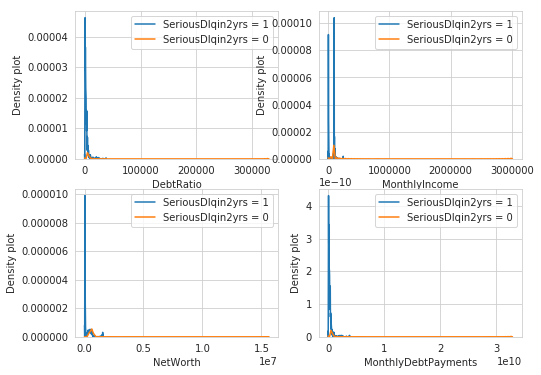

In [87]:
"""Real"""
print("Plotting Density Plot...for Binary")
# Used as opposed to histogram since this doesnt need bins parameter
i = 0
t1 = db_training.loc[db_training['SeriousDlqin2yrs'] != 0]
t0 = db_training.loc[db_training['SeriousDlqin2yrs'] == 0]

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

for feature in Real:
    i += 1
    plt.subplot(2, 2, i)
    sns.kdeplot(t1[feature], bw=0.5, label="SeriousDlqin2yrs = 1")
    sns.kdeplot(t0[feature], bw=0.5, label="SeriousDlqin2yrs = 0")
    plt.ylabel('Density plot', fontsize=10)
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

Plotting Scatter Plot...for Real


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


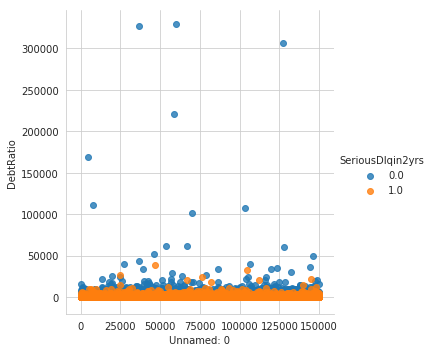

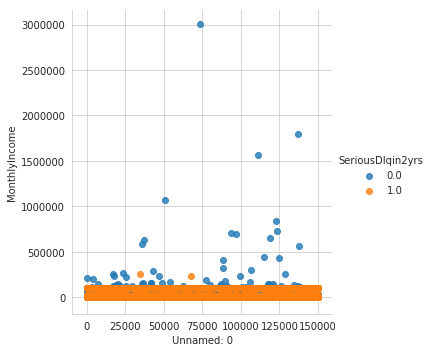

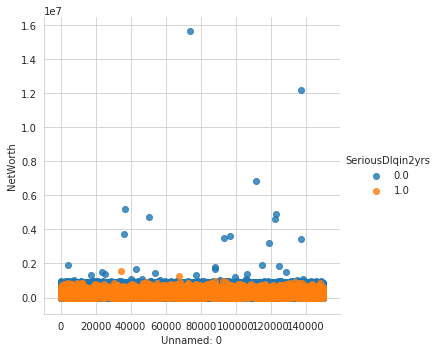

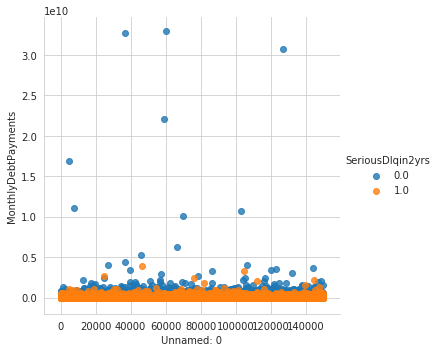

In [88]:
print("Plotting Scatter Plot...for Real")
sns.set_style("whitegrid")  # Chosen
for col in Real:
    sns.lmplot(y=col, x="Unnamed: 0", data=db_training, fit_reg=False, hue='SeriousDlqin2yrs', legend=True,
               size=5, aspect=1)
    plt.show()

**Brief Observations (Improved)**

-'DebtRatio': Contrastingly, those who have had financial distress (SeriousDlqin2yrs=1) posses lower DebtRatio

-'MonthlyIncome': Interesting! Data-set actually has a huge income disparity for those who have had financial distress (SeriousDlqin2yrs=1).

Evidently, from our Preliminary Overview it has a StandardDeviation of 3.650860e+04.

Disparity roughly is between the Less than 33,000 & capping at =100,000.

(SeriousDlqin2yrs=0) instead is more evened out.


-'NetWorth': Reasonable sense, since those who have had financial distress (SeriousDlqin2yrs=1) 
have lower net worth

-'MonthlyDebtPayments': Similar to the pattern found in 'DebtRatio' those who have had financial distress (SeriousDlqin2yrs=1) are paying out lesser existing debts

**BI-VARIATE**


Plotting Pair-Plots


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


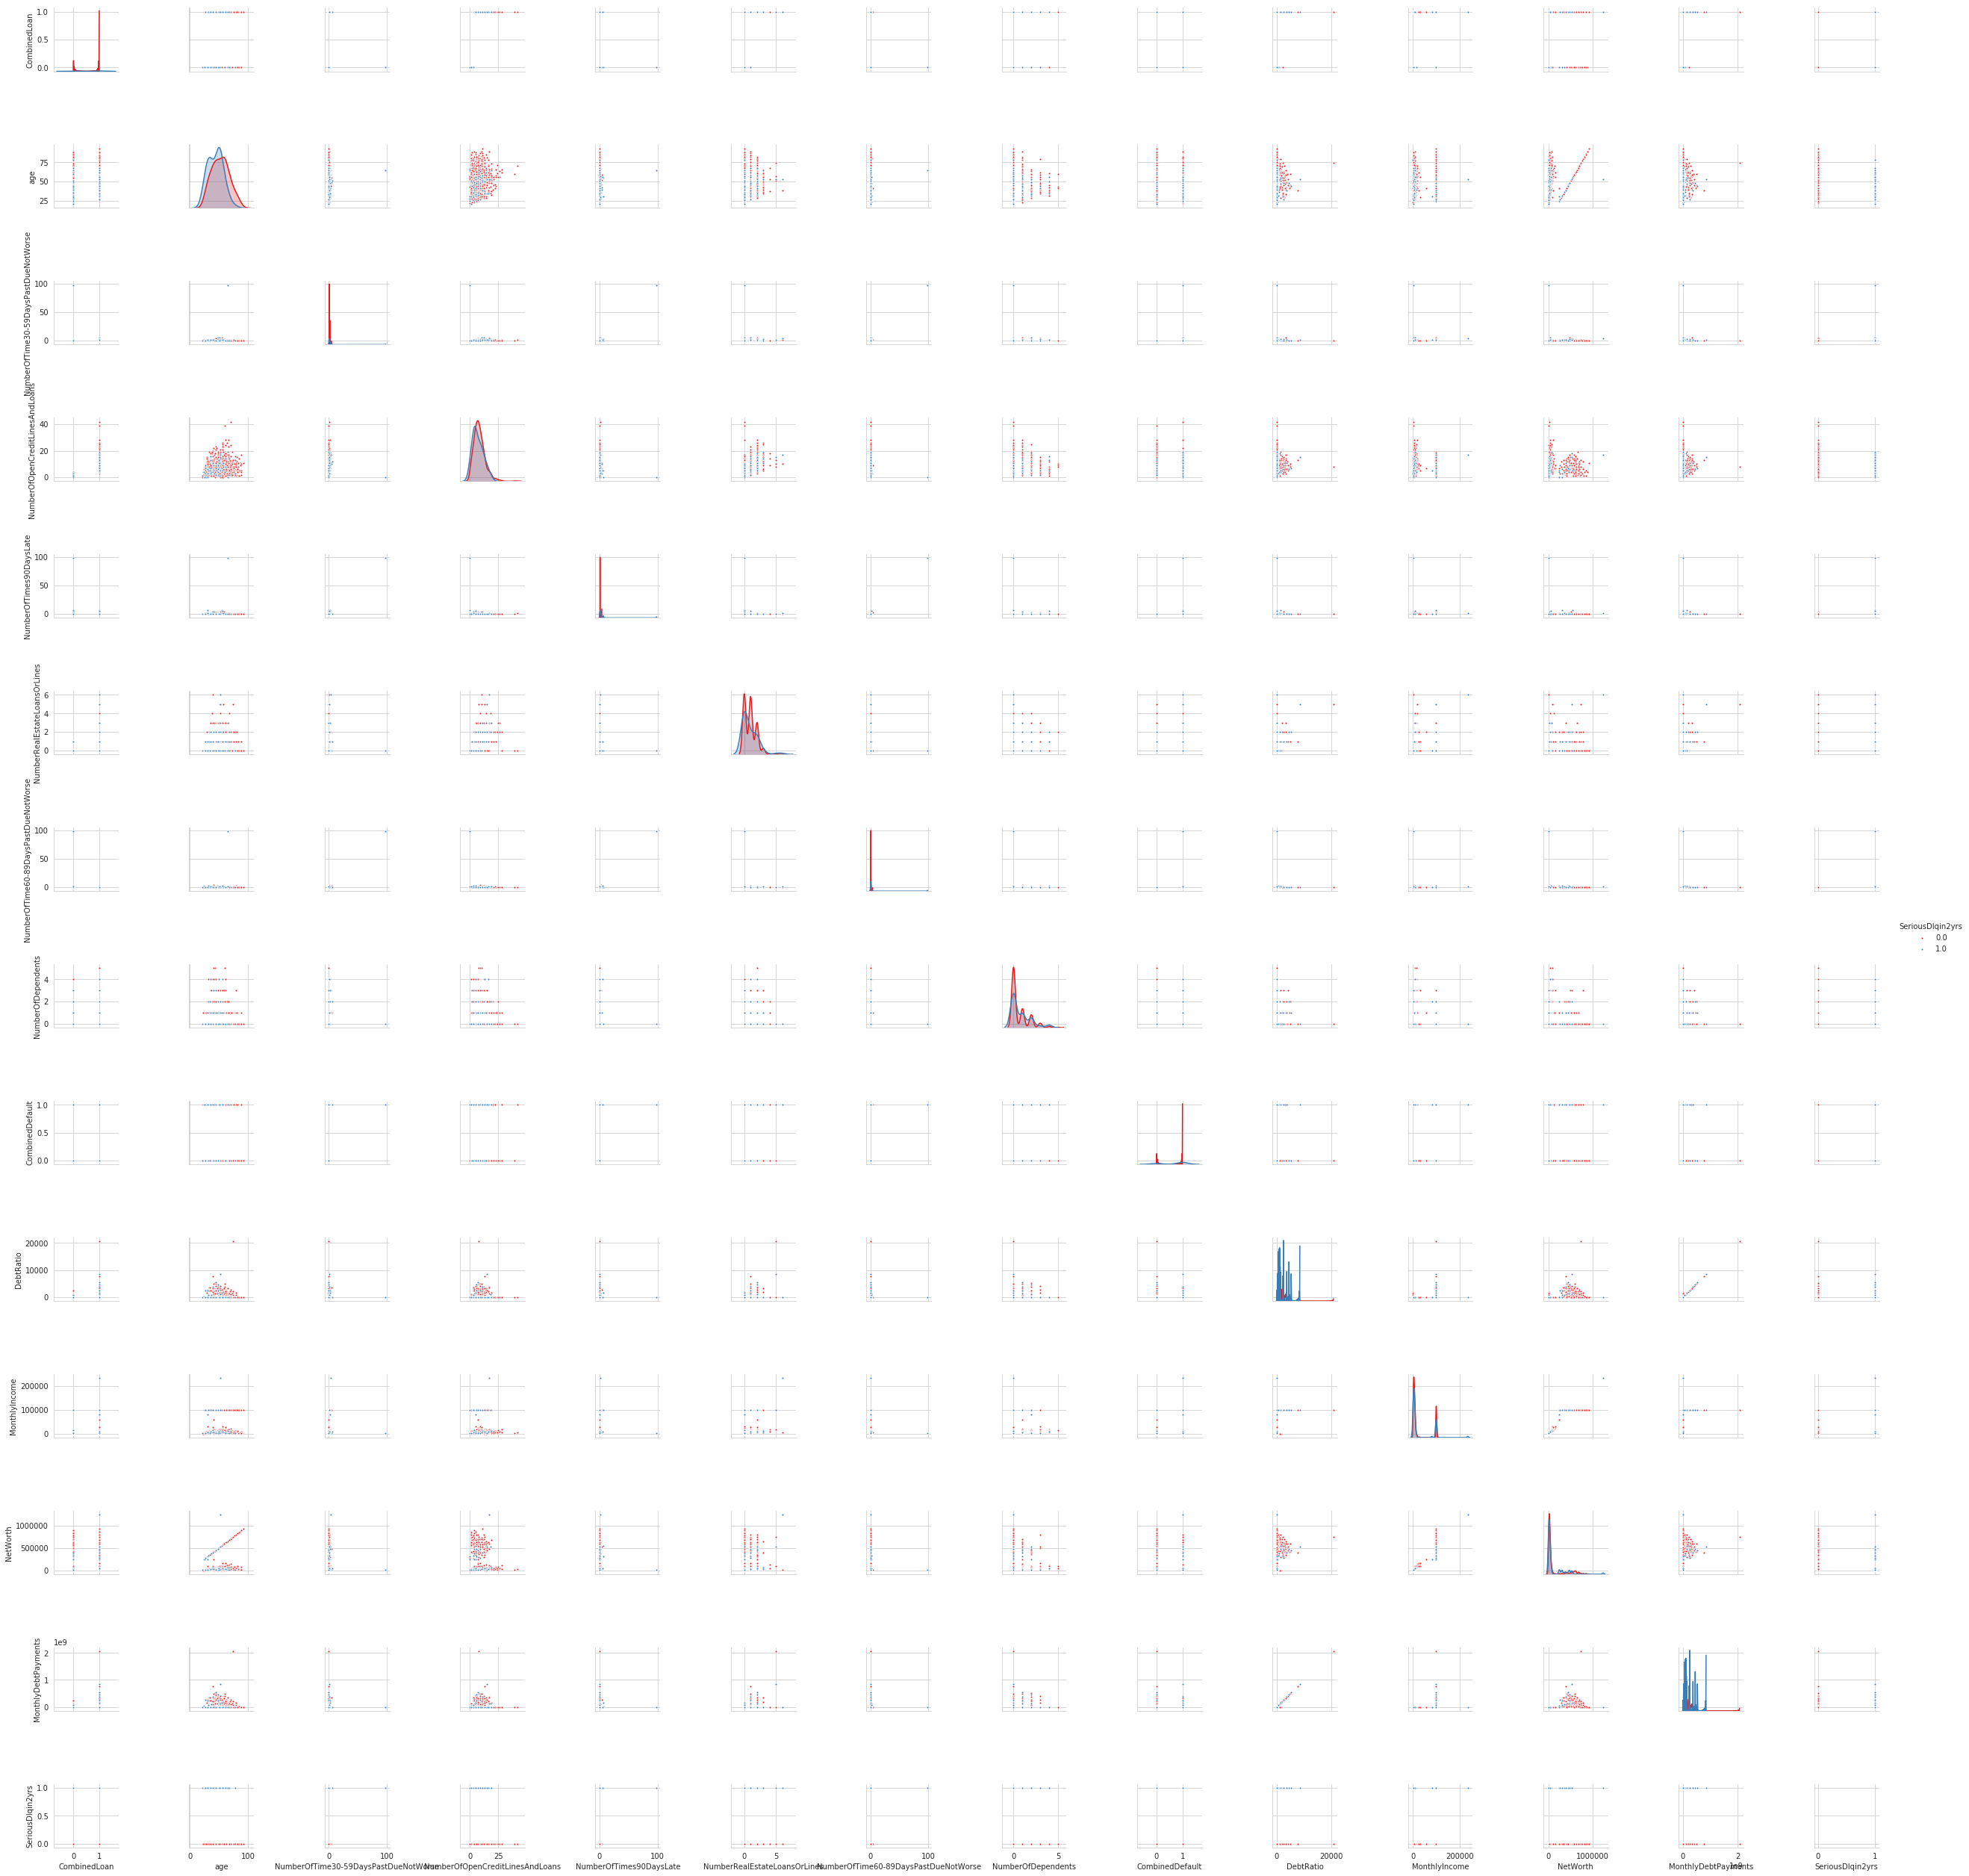

In [89]:
"""Pair-plot"""     
print("Plotting Pair-Plots")
PairPlot = Binary + Integer + Real
# # sample = train_raw_copy.sample(frac=0.5)
sample_SIZE = 800
sample = db_training.sample(sample_SIZE)
PairPlot.extend(['SeriousDlqin2yrs'])  # Add 'target' into list
var = PairPlot
sample = sample[var]
g = sns.pairplot(sample,  hue='SeriousDlqin2yrs', palette='Set1', diag_kind='kde', plot_kws={"s": 8})
plt.show()
PairPlot.remove('SeriousDlqin2yrs')

Okay we have too many features to fit this space....

No matter, let's individually zoom in by manually splitting them up then!

**Age_Map Centralized**

Plotting Scatter Plot...for Bi-variate Focus_set_1


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


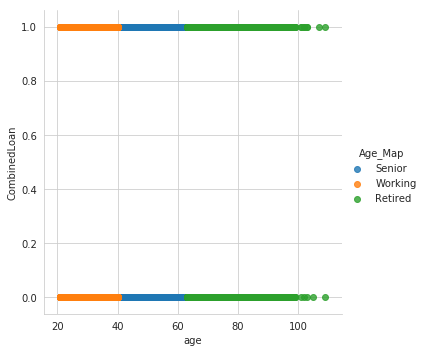

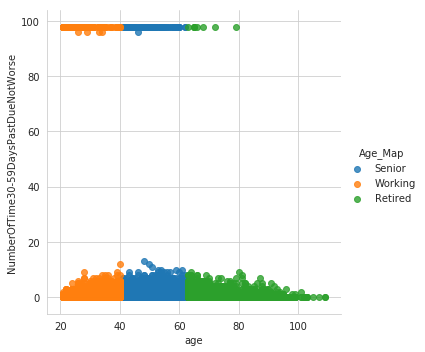

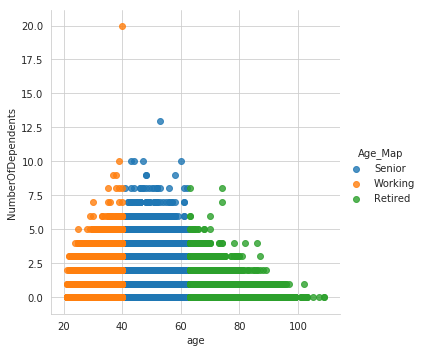

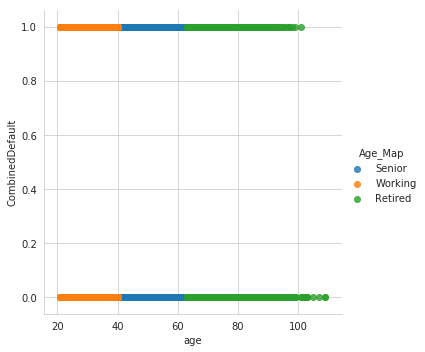

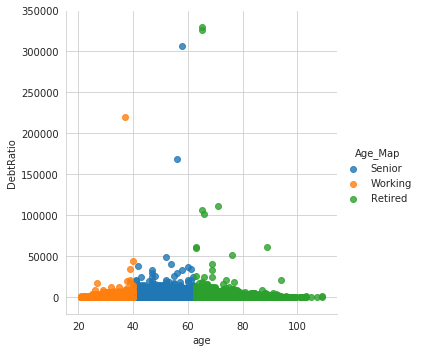

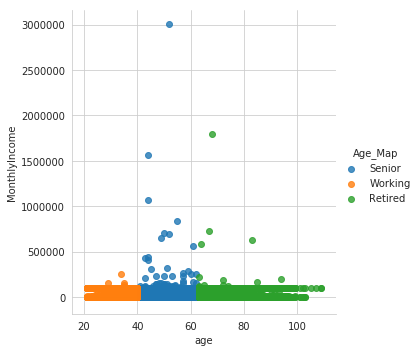

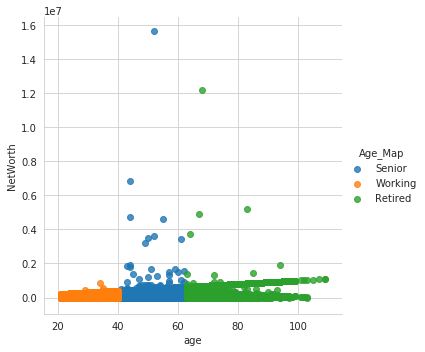

In [90]:
"""Age_Map"""
print("Plotting Scatter Plot...for Bi-variate Focus_set_1")
EDA_BiVariate_1 = ['CombinedLoan',
                   'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfDependents', 'CombinedDefault',
                   'DebtRatio', 'MonthlyIncome',  'NetWorth']
sns.set_style("whitegrid")  # Chosen
for col in EDA_BiVariate_1:
    sns.lmplot(y=col, x='age', data=db_training, fit_reg=False, hue='Age_Map', legend=True,
               size=5, aspect=1)
    plt.show()



> Quick Commentary:

-'CombinedLoan': For both category's of those who made & did not make a loans, they are dominated by 'Retired' by more than 2x

-'NumberOfTime30-59DaysPastDueNotWorse':

Generic Interpretation>

On the high extreme end, dominated by 'Working' & 'Senior'.

On the low extreme end, dominated by 'Retired'

Specific Interpretation>

On the high extreme end, of exceeding over 95times they are split evenly between 'Working' & 'Senior' category's. But rarely 'Retired'

On the low extreme end, of exceeding over but below 15times they are split evenly between between 'Working' & 'Senior' category's. But this time dominated by 'Retired'

-'NumberOfDependents': 'Working' & 'Senior' category's tend to have higher number of dependents. Evidently, mortality means as we grow older we see more deaths..

-'CombinedDefault': Same pattern as 'CombinedLoan'

-'DebtRatio': Evidently, as 'age' increases 'DebtRatio' increases. But begins falling upon retirement at age 63

-'MonthlyIncome': Similar to before, in Uni-variate EDA we spotted a disparity in 'MonthlyIncome'. But this time we can clearly see a gaussian shape appearing. which is also similar to 'DebtRatio' pattern

Evidently, as 'age' increases 'MonthlyIncome' increases. But begins falling upon retirement at age 63

-'NetWorth': This emphasizes the pattern. Evidently, as 'age' increases 'NetWorth' increases. But begins falling upon retirement at age 63.

HOWEVER, the positive gradient also highlights the flaw in our 'NetWorth' Derivation. Since we are essentially assuming constant income growth & ignoring depreciation considerations for the time value of money (i.e.From my placement year in a Pension's Consultancy firm, we need to include annuities which accounts for both interest rates and mortality.



**Income_Map Centralized**

Plotting Scatter Plot...for Bi-variate Focus_set_2


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


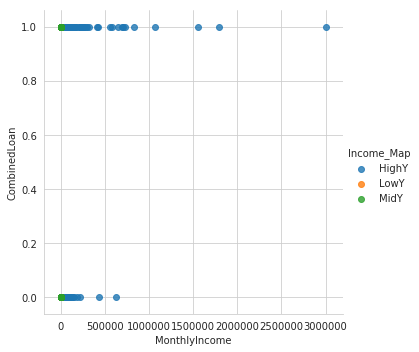

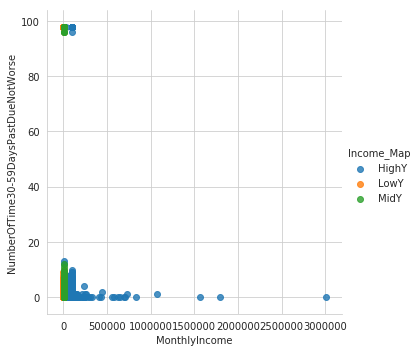

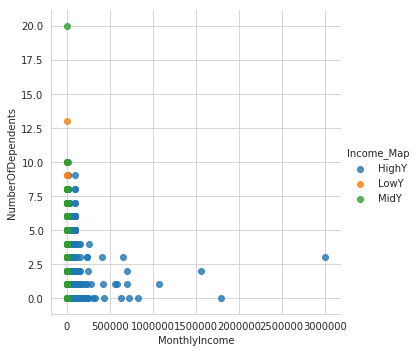

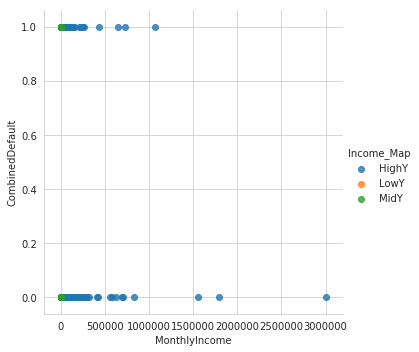

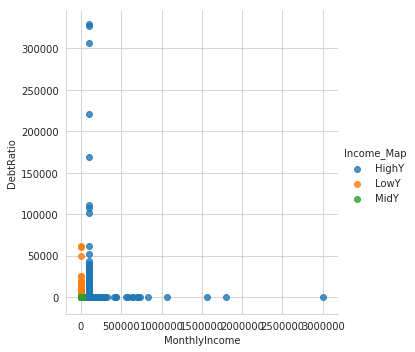

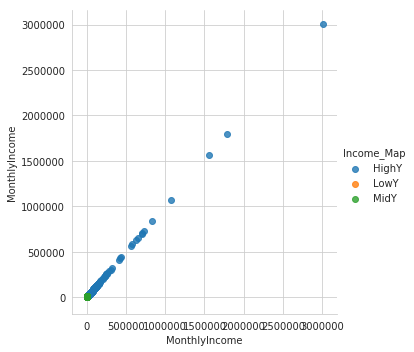

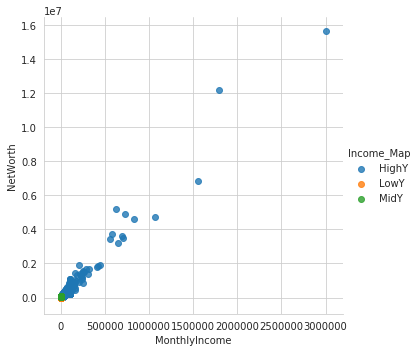

In [91]:
"""Income_Map"""
print("Plotting Scatter Plot...for Bi-variate Focus_set_2")
EDA_BiVariate_2 = ['CombinedLoan',
                   'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfDependents', 'CombinedDefault',
                   'DebtRatio', 'MonthlyIncome',  'NetWorth']
sns.set_style("whitegrid")  # Chosen
for col in EDA_BiVariate_1:
    sns.lmplot(y=col, x='MonthlyIncome', data=db_training, fit_reg=False, hue='Income_Map', legend=True,
               size=5, aspect=1)
    plt.show()

Quick Commentary:

-'CombinedLoan': Clearly, those who have made & did not make Loans are dominated by the higher tier income earners

-'NumberOfTime30-59DaysPastDueNotWorse': From a relative perspective, those who exceed the 30-59Days deadline are dominated by higher tier income earners

-'NumberOfDependents': The higher the 'MonthlyIncome', the lower the Dependents

-'CombinedDefault': Same pattern as 'CombinedLoan'

-'DebtRatio': The higher the 'MonthlyIncome', the higher the 'DebtRatio'

-'MonthlyIncome': n/a

-'NetWorth': Obvious of higher 'MonthlyIncome' equates to higher 'NetWorth'

**Others_A Centralized**

Plotting Scatter Plot...for Bi-variate Focus_set_3


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


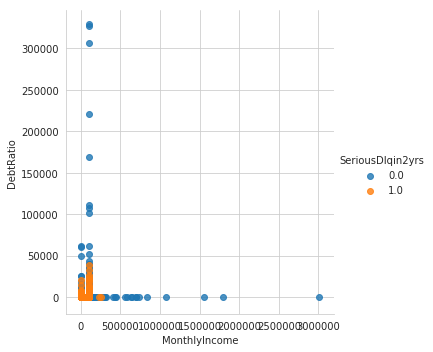

In [92]:
"""Others_A"""
print("Plotting Scatter Plot...for Bi-variate Focus_set_3")
sns.set_style("whitegrid")  # Chosen
sns.lmplot(y='DebtRatio', x='MonthlyIncome', data=db_training, fit_reg=False, hue='SeriousDlqin2yrs', legend=True,
           size=5, aspect=1)
plt.show()

Quick Commentary:

Those who have had financial distress (SeriousDlqin2yrs=1) clearly have lower 'DebtRatio' & 'MonthlyIncome'

**Others_B Centralized**

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


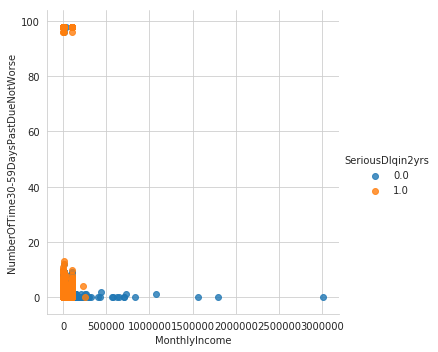

In [93]:
"""Others_B"""
sns.lmplot(y='NumberOfTime30-59DaysPastDueNotWorse', x='MonthlyIncome', data=db_training, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

**Quick Commentary:**

Contrastingly, often those who have had financial distress (SeriousDlqin2yrs=1) have exceeded the 30-59Days deadline only a few times

Others_C Centralized

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


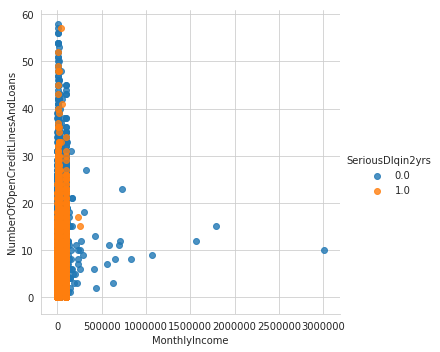

In [95]:
"""Others_C"""
sns.lmplot(y='NumberOfOpenCreditLinesAndLoans', x='MonthlyIncome', data=db_training, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

**Quick Commentary:**

    Similarly, those who have had financial distress (SeriousDlqin2yrs=1) actually open lesser loans than those of without financial distress (SeriousDlqin2yrs=0)

**Others_D Centralized**

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


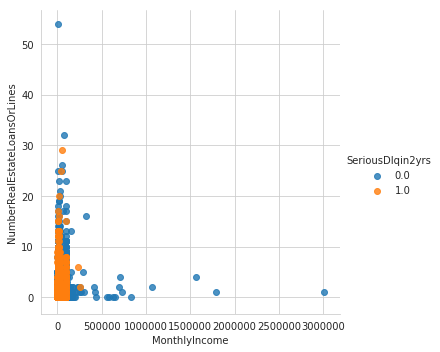

In [96]:
"""Others_D"""
sns.lmplot(y='NumberRealEstateLoansOrLines', x='MonthlyIncome', data=db_training, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

**Quick Commentary:**

Same pattern as Others_C_Centralized !!

**Others_E Centralized**

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


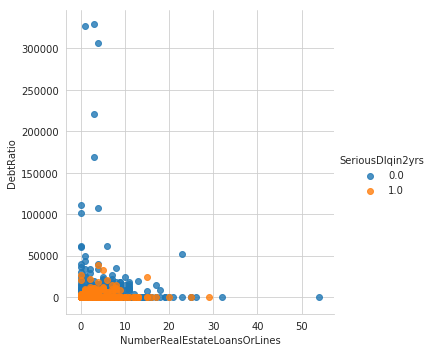

In [97]:
"""Others_E"""
sns.lmplot(y='DebtRatio', x='NumberRealEstateLoansOrLines', data=db_training, fit_reg=False, hue='SeriousDlqin2yrs',
           legend=True, size=5, aspect=1)
plt.show()

**Quick Commentary:**

Similarly, those who have had financial distress (SeriousDlqin2yrs=1) actually a lower 'DebtRatio' 

**Others_F Centralized**

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


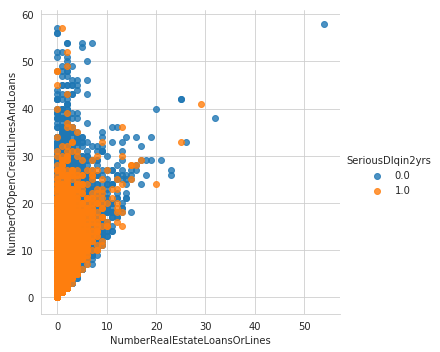

In [98]:
"""Others_F"""
sns.lmplot(y='NumberOfOpenCreditLinesAndLoans', x='NumberRealEstateLoansOrLines', data=db_training, fit_reg=False,
           hue='SeriousDlqin2yrs', legend=True, size=5, aspect=1)
plt.show()

**EDA SUMMARY**

Focus_set_1

-Disobedient acts (making excessive loans & defaults or exceed deadlines) often made by 'Retired'

-Realistic data-set, income plateau and falls while proceeding with age

Focus_set_2

-Disobedient acts often made by Higher-tier income

-Credit balloon; since as Higher-tier income exhibit higher extremes of making loans & experiencing default

-Higher-tier income tend to have lesser dependents. Self-centred data-set?

Focus_set_3

-Contrasting relationships. When experiencing financial distress (SeriousDlqin2yrs=1), borrows actually have a "apt" financial circumstance (lower 'DebtRatio' & exceeding deadlines & making loans or having defaults) but only have low 'MonthlyIncome'

Alternative POV, low 'MonthlyIncome' main driver for financial distress, while 'DebtRatio' & exceeding deadlines & making loans or having defaults play less significant effect.

 **Heat-Map Reference**
 


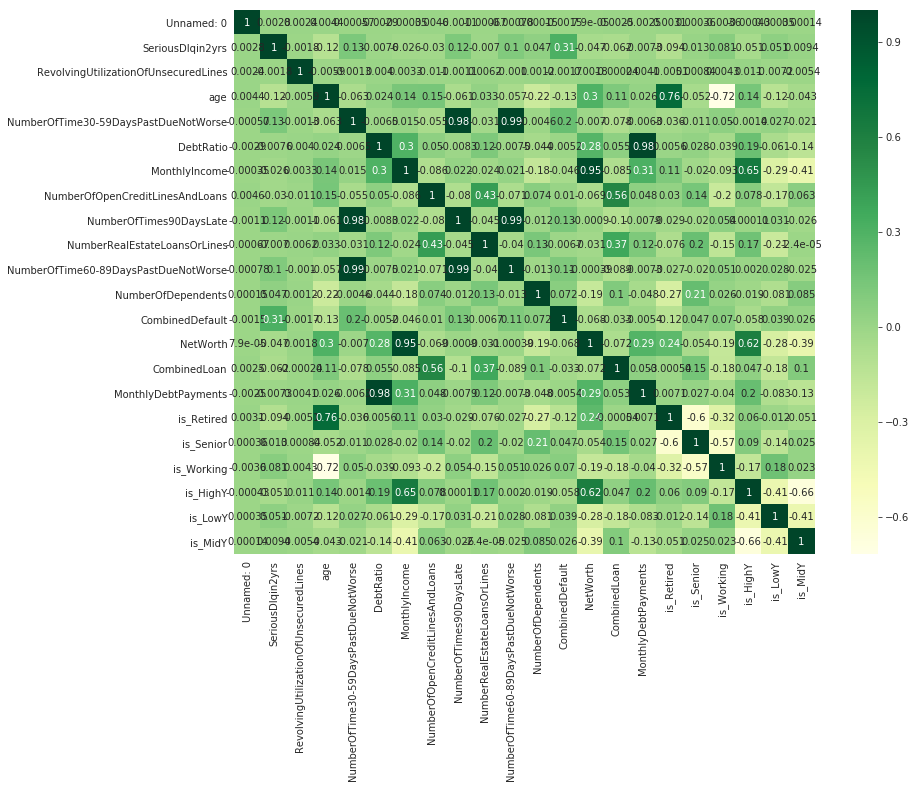

In [101]:
cor = db_training.corr()
plt.figure(figsize=(13, 10))
# sns.set(font_scale=0.7)
sns.heatmap(cor, annot=True, cmap='YlGn')
plt.show()

**FEATURE ENGINEERING SUMMARY**

    Now with the added support of the HeatMap correlations to our EDA analysis, we can further justify and decide on which features to discard or keep.

    Keep CombinedDefault since it outperforms in correlation

    -Keep 'NumberOfTime30-59DaysPastDueNotWorse' since it has the highest 'target variable' correlation amonst the original 3. But still bears low multi-collinearity with CombinedDefault

    -Drop NumberOfTime60-89DaysPastDueNotWorse & NumberOfTimes90DaysLate

    New Feature: Net Worth

    -Keep NetWorth since it outperforms in correlation
        -Drop MonthlyIncome; Since NetWorth has higher correlation. NetWorth as a proxy for 'MonthlyIncome' given the formula.

    Join No# Loans: CombinedLoans

    -Keep CombinedLoans. Used as proxy for original features

    -Drop NumberOfOpenCreditLinesAndLoans & NumberRealEstateLoansOrLines to avoid multi-collinearity.

    New Feature: Monthly debt payments

    -Drop MonthlyDebtPayments since its correlation is still lower than 'DebtRatio'

    New Feature: Age Map (is_Retired & is_Senior & is_Working

    -Drop Age_Map & is_Retired & is_Senior & is_Working, since original 'age' outperforms

    New Feature: Income Map (is_LowY & is_MidY & is_HighY

    -Drop Income_Map & is_LowY & is_MidY & is_HighY, since original 'MonthlyIncome'' outperforms

TRAIN/TEST SPLT

In [0]:
"""Read & Open CSV files"""
# Open Train & Test files
train_raw = pd.read_csv('cs-training.csv', na_values=-1) #FYI na_values are defined in the original data page
test_raw = pd.read_csv('cs-test.csv', na_values=-1)
# Copy Train file for workings
train_raw_copy = train_raw.copy(deep=True)
# Copy Train file for workings
# db_training = training_raw.copy(deep=True)

In [109]:
"""
Prepare Data
"""
# Split our predictors and the target variable in our data-sets
"""Train set"""
X = train_raw_copy.drop("SeriousDlqin2yrs", axis=1).copy()
y = train_raw_copy.SeriousDlqin2yrs
print(X.shape, '\n', y.shape)

"""Test set"""
X_test = test_raw.drop("SeriousDlqin2yrs", axis=1).copy()
y_test = test_raw.SeriousDlqin2yrs
print(X_test.shape, '\n', y_test.shape)


"""Train/test split of data-set"""
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=1234)

(150000, 11) 
 (150000,)
(101503, 11) 
 (101503,)


# **MODELS**

    Here I am going to use:

    Black-Box Models (XGB Classifier, Random Forest Classifier)

    We will first define a general function to help us normalize all feature scorings.

   Black box models use GINI importance

FEATURE COMPARSION FUNCTION

In [113]:
"""
Model
"""
RandomState = 42

"""Preparing Side to Side Comparative Function"""
from sklearn.preprocessing import MinMaxScaler


def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks))


names = X.columns
ranks = {}
print('Prep done...')

Prep done...


**XGB Classifier**

In [128]:
"""
XGBClassifier - Feature Importance - PART 1
"""
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
print("Running XGBClassifier Feature Importance Part 1...")
model_XGBC = XGBClassifier(objective='binary:logistic',
                           max_depth=7, min_child_weight=5,
                           gamma=0,
                           learning_rate=0.1, n_estimators=100,)
model_XGBC.fit(X_train, y_train)
model_XGBC.fit(std_data, y_train)
print("XGBClassifier Fitted")
"""Side To Side"""
print("Ranking Features with XGBClassifier...")
ranks["XGBC"] = rank_to_dict(model_XGBC.feature_importances_, names)
print(ranks["XGBC"])

Running XGBClassifier Feature Importance Part 1...
XGBClassifier Fitted
Ranking Features with XGBClassifier...
{'Unnamed: 0': 0.0, 'RevolvingUtilizationOfUnsecuredLines': 0.19, 'age': 0.01, 'NumberOfTime30-59DaysPastDueNotWorse': 0.24, 'DebtRatio': 0.01, 'MonthlyIncome': 0.0, 'NumberOfOpenCreditLinesAndLoans': 0.01, 'NumberOfTimes90DaysLate': 1.0, 'NumberRealEstateLoansOrLines': 0.01, 'NumberOfTime60-89DaysPastDueNotWorse': 0.11, 'NumberOfDependents': 0.0}


**PLOT FEATURES**

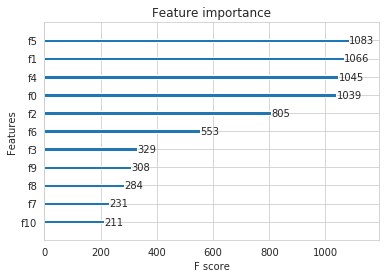

In [126]:
"""Plotting"""
# plot feature importance for feature selection using default inbuild function
plot_importance(model_XGBC)
plt.show()

**NOT PART OF THE MAIN WORK**

In [130]:
# sample = pd.read_csv('sampleEntry.csv')
# sample.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [131]:
# db_training.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,CombinedDefault,NetWorth,CombinedLoan,MonthlyDebtPayments,Age_Map,is_Retired,is_Senior,is_Working,Income_Map,is_HighY,is_LowY,is_MidY
0,1.0,1.0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,1,41040.0,1,7323,Senior,0,1,0,HighY,1,0,0
1,2.0,0.0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,0,10400.0,0,316,Working,0,0,1,LowY,0,1,0
2,3.0,0.0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,1,11559.6,0,258,Working,0,0,1,LowY,0,1,0
3,4.0,0.0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,0,9900.0,1,118,Working,0,0,1,LowY,0,1,0
4,5.0,0.0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,1,311581.2,1,1584,Senior,0,1,0,HighY,1,0,0


In [132]:
# db_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [149]:
# Let's split our predictors and the target variable in our datasets
# X = db_training.drop(["SeriousDlqin2yrs"], axis=1).copy()
# y = db_training.SeriousDlqin2yrs
# X.shape, y.shape

((150000, 23), (150000,))

In [145]:
#X_test = db_test.drop("SeriousDlqin2yrs", axis=1).copy()
# y_test = db_test.SeriousDlqin2yrs
# X_test.shape, y_test.shape

((101503, 11), (101503,))

In [0]:
#let's first try the penalized model Logit by providing the class_weight="balanced" parameter
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split, cross_val_predict #to perform stratified sampling using cv param
# from sklearn.metrics import roc_curve, roc_auc_score #AUC score
# from sklearn.preprocessing import StandardScaler

# X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)
# logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
# scaler = StandardScaler().fit(X_train)